# Introduction to statistical learning

**1.  For each of parts (a) through (d), indicate whether we would generally expect the performance of a flexible statistical learning method to be better or worse than an inflexible method. Justify your answer**

*(a) The sample size n is extremely large, and the number of predictors p is small.*

Without knowing anything about the functional form of the relationship between the response and the predictor, in this situation a more flexible method would generally perform better. This is because given the large number of observation will give the model ample opportunity to learn the functional relationship between the response and the predictors.

*(b)  The number of predictors p is extremely large, and the number of observations n is small.*

In this situation a very flexible method with high variance would be likely to overfit responding to the noise in the data. In this situation we could avoid overfitting by selecting an inflexible learning method such as linear regression.

*(c) The relationship between the predictors and response is highly non-linear.*

This situation would warrant a more flexible statistical learning method. This is because inflexible methods would not be able to capture the true functional form between the response and the predictor if it was highly non-linear. In this scenario an inflexible method would have high bias - its expected value given an input vector of the predictor would systematically deviate from the true value by a large amount. 

*(d) The variance of the error terms, i.e. $\sigma = Var(\epsilon)$, is extremely high.*

If the variance of the irreducible error was extremely high a very flexible method would overfit by responding to the noise in the data. In this case a less flexible method would be preferable, it would have low variance allowing for more robust estimates of the predictor.

**2.  Explain whether each scenario is a classification or regression problem, and indicate whether we are most interested in inference or prediction. Finally, provide n and p.**

*(a) We collect a set of data on the top 500 firms in the US. For each firm we record profit, number of employees, industry and the CEO salary. We are interested in understanding which factors affect CEO salary.*

This is a regression problem because we are trying to predict CEO salary which is a quantitative variable. In this scenario n=500 and the predictor, p, are: profit, number of employees and industry. Because we want to understand which factors affect CEO salary we are more interested in inference rather than prediction here.

*(b)  We are considering launching a new product and wish to know whether it will be a success or a failure. We collect data on 20 similar products that were previously launched. For each product we have recorded whether it was a success or failure, price charged for the product, marketing budget, competition price, and ten other variables.*

Success or failure is a binary outcome. For this reason this is a classification problem - we are trying to assign products to a class. In this case n=20 and the predictors are: price, marketing budget, competition price and the ten other variables. Because we want to know wheter the product will be a success or failure in this scenario we care more about prediction - we're not interested in which predictors are important just whether the product will be a success.

*(c) We are interested in predicting the % change in the USD/Euro exchange rate in relation to the weekly changes in the world stock markets. Hence we collect weekly data for all of 2012. For each week we record the % change in the USD/Euro, the % change in the US market, the % change in the British market, and the % change in the German market.*

Predicting the percentage change in the USD/Euro exchange rate would be a regression problem. In this case n=52 for each week of data collected and the predictors are the weekly % in each of stock markets mentioned. Here we are more interested in prediction.


**3. We now revisit the bias-variance decomposition.**

*(a)  Provide a sketch of typical (squared) bias, variance, training error, test error, and Bayes (or irreducible) error curves, on a single plot, as we go from less flexible statistical learning methods towards more flexible approaches. The x-axis should represent the amount of flexibility in the method, and the y-axis should represent the values for each curve. There should be five curves. Make sure to label each one.*

We can sketch these curves using python. Firstly lets consider what each curve will look like as model flexibility increases.

1. squared bias

Squared bias captures the difference between the expected value of our estimator and the true value it is trying to estimate. As we increases the flexibility of a statistical learning method squared bias will decrease monotonically - perhaps at a decreasing rate - this is because more flexible methods can fit more complex functional forms that can get closer to the true relationship between the predictors and the response variable.

2. variance

Variance refers to the variance of our estimator. This value will capture the amount our estimate for a given input of predictors if we trained the model on a different dataset. More flexible methods tend to follow the training data very closely and hence have higher variance as changing just one value in the training set can drastically alter the estimator. Therefore, we may expect variance to increase monotonically with flexibility

3. training error

Training error refers to evaluating the model agaisnt the data it was trained on. In a regression model this could be the MSE whereas in a classification model it might be the error rate. More flexible method follow the training model very closely and hence will result in a lower training error. Training error will decrease monotonically with flexibility.

4. test error

Test error refers to evaluating the model with data that was not used to train the model. The relationship between test error rate and flexibility depends on the relationship between the response and the predictors. However, in general as flexibility increases we should initially see the test error rate come down and then we get to a point where the model has overfit and test error rate starts to icnrease.



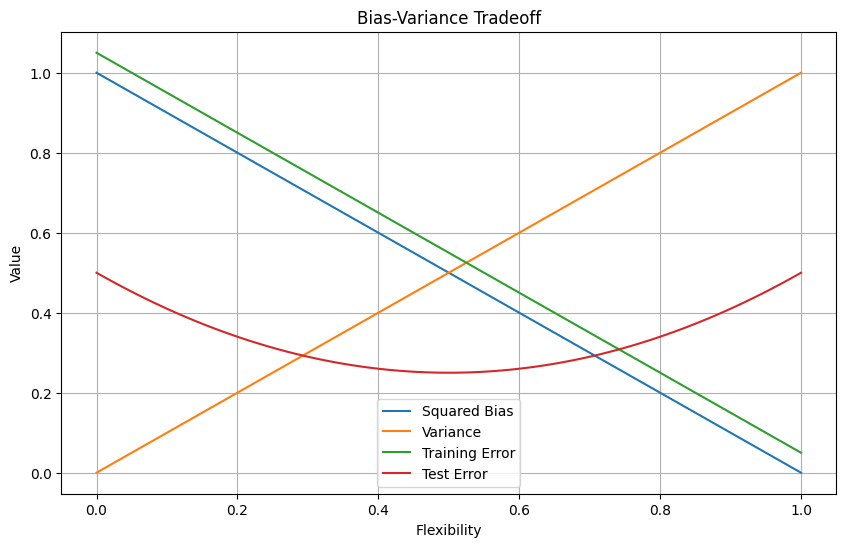

In [10]:
import numpy as np
import matplotlib.pyplot as plt

flexibility = np.linspace(0, 1, 100)  # Range of flexibility

# Squared bias curve
squared_bias = 1 - flexibility
# Variance curve
variance = flexibility
# Training error curve (decreasing)
training_error = 1 - flexibility + 0.05
# Test error curve (U-shape)
test_error = 0.5 * (flexibility**2 + (1 - flexibility)**2)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(flexibility, squared_bias, label='Squared Bias')
plt.plot(flexibility, variance, label='Variance')
plt.plot(flexibility, training_error, label='Training Error')
plt.plot(flexibility, test_error, label='Test Error')
plt.xlabel('Flexibility')
plt.ylabel('Value')
plt.title('Bias-Variance Tradeoff')
plt.legend()
plt.grid(True)
plt.show()

**4.  You will now think of some real-life applications for statistical learning.**

*(a) Describe three real-life applications in which classification might be useful. Describe the response, as well as the predictors. Is the goal of each application inference or prediction? Explain your answer.*

1. Predicting whether an opportunity in a company sales pipeline will be a win or a loss. This would be helpful for sales and revenue prediction as well as resource management as it will allow the company to focus efforts where they are most likely to win. From an inference perspective the company would also be interested in why a particular opportunity had a was predicted to be a win or a loss - this would give them some insight into actions they could take to further increase sales in the future. The predictors might be the number of opportunities you have won with that client before, the client's industry, the performance of the service you were trying to sell and the sales managers track record. 

2. Classifying an image as explicit for a social media company. Here the goal would solely be prediction - we want the classifier to be as accurate as possible to ensure no explicity images are viewed by minors. Classifying images as explicit would require a large number of predictors such as features from the image itself and the image metadata so in this scenario a flexible model would probably perform better. 

3. Classifying customers who are likely to churn. A customer who churns means they cancel their subscription to a service. The company would like to know who is likely to churn as this will allow for targetted marketing to these customers to reduce this. Here the predictors might be years of membership, type of subscription, age of the customer, customers working status etc. The goal here would be both inference and prediction the company would want to know who is likely to churn and why - the why would allow for even more personalised marketing. 

*(b)  Describe three real-life applications in which regression might be useful. Describe the response, as well as the predictors. Is the goal of each application inference or prediction? Explain your answer.*

1. Predicting house prices. Home owners could use the model to understand the true value of their homes. It would be useful from a prediction perspective as home owners would want accuracy, but also from an inference perspective - what actually makes a home more valuable would be useful knowledge for home owners because they could identify how to add value to their homes. The response would be the value of a house and the predictors would include floor space, number of bedrooms, number of bathrooms, year of build, if it has a garden etc...

2. Predicting students exam scores. Schools could use this to identify students who will need more support throughout their time as pupils. Agains their is a prediction angle and an inference angle. The predictors would be socioeconomic background, number of times late, immigration status, family size etc..

3. Predicting the number of viewers a music video would get. This would be useful for AD or PR agencies. They would care more about inference, why popular videos are popular, because this would inform them as to what type of content they should include in their videos. Predictors might include the video style such as animated or not, the actors in the video and their characteristic, the length of the video, some characteristic about the video intro.

*(c) Describe three real-life applications in which cluster analysis might be useful.*

1. Customer segmentation. Companies might perform a cluster analysis to understand if they group their customers into distinct groups. This might represent the first part of analysis where each subgroup is investigated further.

2. Fraud analysis. A bank would perform cluster analysis on the transactions made to and from their account holders. Transactions that fall outside of the main cluster would be highlighted for potential fraud and subjected to further investigation.

3. Web analytics - a SaaS company might develop a cluster analytics platform that can segment visitors to a website based on their behaviour.


**5.  What are the advantages and disadvantages of a very flexible (versus a less flexible) approach for regression or classification? Under what circumstances might a more flexible approach be preferred to a less flexible approach? When might a less flexible approach be preferred.**

Highly flexible methods will be preferable when the relationship between the response and the predictors is highly nonlinear. When the we have a highly nonlinear relationship the bias of a less flexible will be very high as it will not be able capture complexities. For example, linear regression can only produce linear relationships and therefore it will not accurately capture any higher order relationships between the response and predictors. When prediction is key this advantage of flexible methods is even more pertinent. However, if the true relationship is not highly non-linear a less flexible can actually be preferable because a very flexible method will overfit to the data. On the other hand, when inference is the aim we will almost always want to use a less flexible method. This is because very flexible methods are essentially black-boxes, when get an output for the prediction of the response but we do not know why the learning method produced this output.

**6. Describe the differences between a parametric and a non-parametric statistical learning approach. What are the advantages of a parametric approach to regression or classification (as opposed to a non parametric approach)? What are its disadvantages?**

A parametric statsitical learning method first assumes a functional form, that is shape, of the relationship between the response and the predictors. For example, linear regression is a parametric model it assumes the response is a linear combination of the predictors. 

$$
f(X) = \alpha + \beta_{1}X_{1} + ... + \beta{p}X_{p}
$$

Once we have assumed a particular functional form we move onto to applying a procedures to estimates the parameters in the model. In the linear model example we need to find estimates for $\alpha$ and for each $\beta$ generally this is done by the ordinary least squares method (OLS). OLS seeks to minimise the sum of the squared residuals, the sum of the squared difference between the linear model and the actual observations - this is done via partial differentiation. 

Non parametric methods, on the other hand, do not make any explicit assumptions about the functional form of $f(X)$. Instead they seek an estimate of $f$ that gets as close to the observed data as possible without being too rough.

The advantages of a parametric approach is that they are simpler to understand as an explicit shape of $f$ is assumed from the outset. The disadvantage is the model we choose might not accurately capture the true shape of $f$ as it is limited in the shapes it can take on. Non-parametirc methods do not suffer from this second problem, meaning they can capture any form of relationship. However, non-parametric methods typically need large datasets to find an accurate estimate for $f$. Without large datasets, non-parametric methods can overfit to the data which means they are following the error or noise too closely.